**Step 1: Install Required Libraries**

In [39]:
# Install required libraries
!pip install -q kagglehub streamlit pyngrok pandas matplotlib plotly seaborn tensorflow
!pip install ydata-profiling

**Step 2: Import Required Modules**

In [40]:
import kagglehub
import pandas as pd
import numpy as np
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Step 3: Dataset Loading and Preprocessing**

In [41]:
# Download the dataset
path = kagglehub.dataset_download("ananthr1/weather-prediction")
data_path = path + '/seattle-weather.csv'

# Load the dataset
data = pd.read_csv(data_path)
data.dropna(inplace=True)  # Remove missing values
data['date'] = pd.to_datetime(data['date'])  # Convert date to datetime
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


histogram

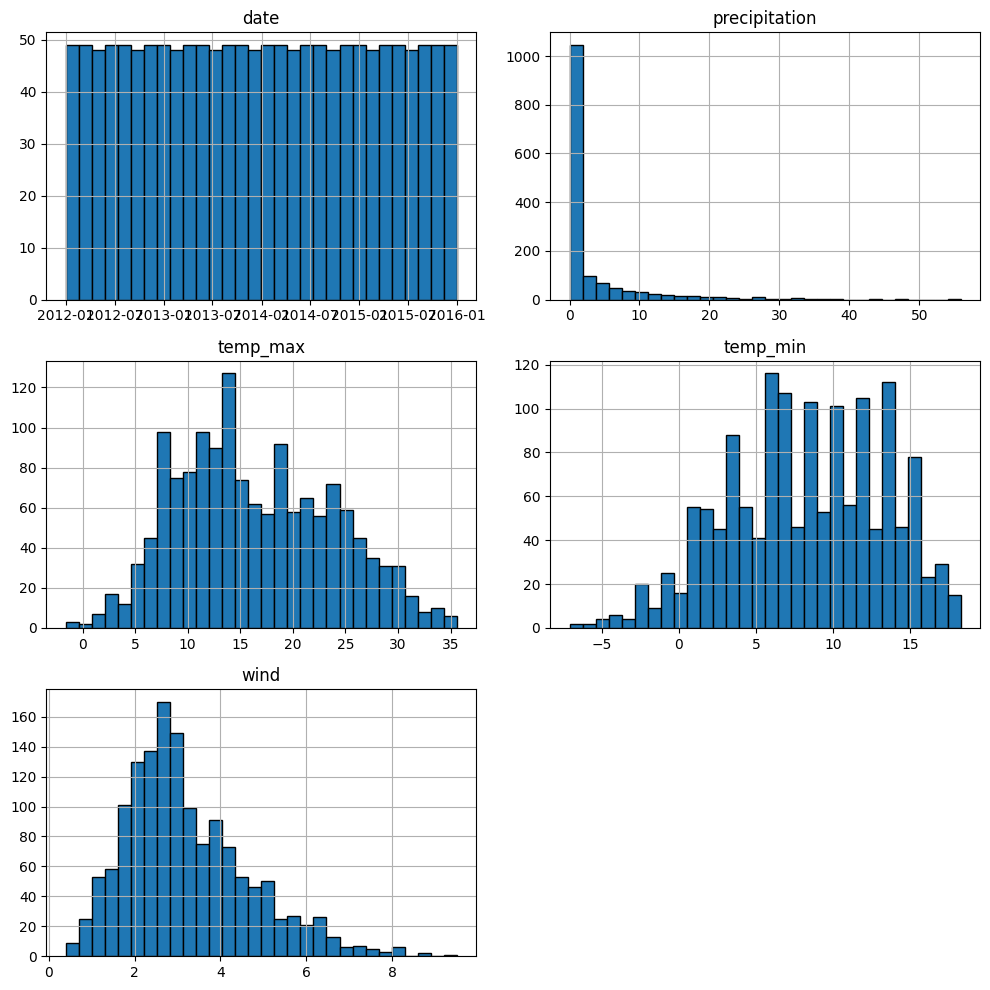

In [42]:
data.hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

การใช้ ydata_profiling

In [43]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data, title='YData Profiling Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Step 4: Exploratory Data Analysis (EDA)**

Line Plot for Daily Max and Min Temperatures

In [44]:
fig = px.line(data, x='date', y=['temp_max', 'temp_min'],
              labels={'value': 'Temperature (°C)', 'date': 'Date'},
              title='Daily Max and Min Temperatures')
fig.show()

Weather Type Distribution

In [48]:
weather_counts = data['weather'].value_counts().reset_index()
weather_counts.columns = ['Weather Type', 'Count']
fig = px.bar(weather_counts, x='Weather Type', y='Count', title='Weather Type Distribution')
fig.show()

**Step 5: Data Preparation for Neural Network**

Sliding Window Function

In [49]:
# Extract temperature column and reshape
training = data['temp_max'].values.reshape(-1, 1)

# Define sliding window function
def df_to_XY(data, window_size=10):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

WINDOW_SIZE = 10
X, y = df_to_XY(training, WINDOW_SIZE)

Train-Validation-Test Split

In [50]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:1000], y[800:1000]
X_test, y_test = X[1000:], y[1000:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Step 6: Neural Network Model Creation**

Define and Compile the Model

In [19]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Train the Model

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 253.6856 - val_loss: 245.7448
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 108.9252 - val_loss: 147.4460
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 65.7883 - val_loss: 118.6963
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 61.0089 - val_loss: 104.0484
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 58.8887 - val_loss: 93.6645
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 60.8720 - val_loss: 87.3630
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 55.7565 - val_loss: 82.3194
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 55.0021 - val_loss: 80.1232
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 52.8509 - val_loss: 78.9220
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 55.3143 - val_loss: 77.0570
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 53.8032 - val_loss: 76.5104
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━

Graph of the change in loss values ​​of the model throughout training.

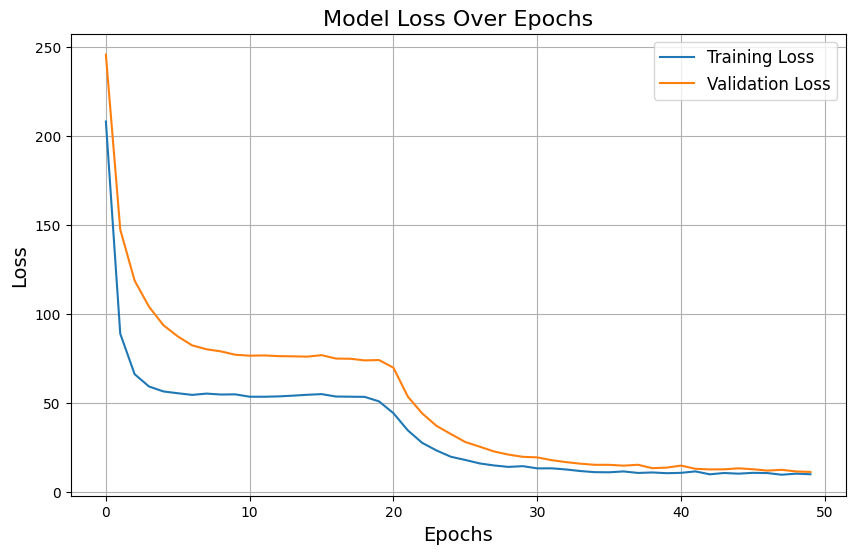

In [22]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Save the Model

In [23]:
model.save('lstm_weather_model.h5')

**Step 7: Evaluate the Model**

Make Predictions

In [24]:
y_pred_val = model.predict(X_val).flatten()
y_pred_test = model.predict(X_test).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Plotting

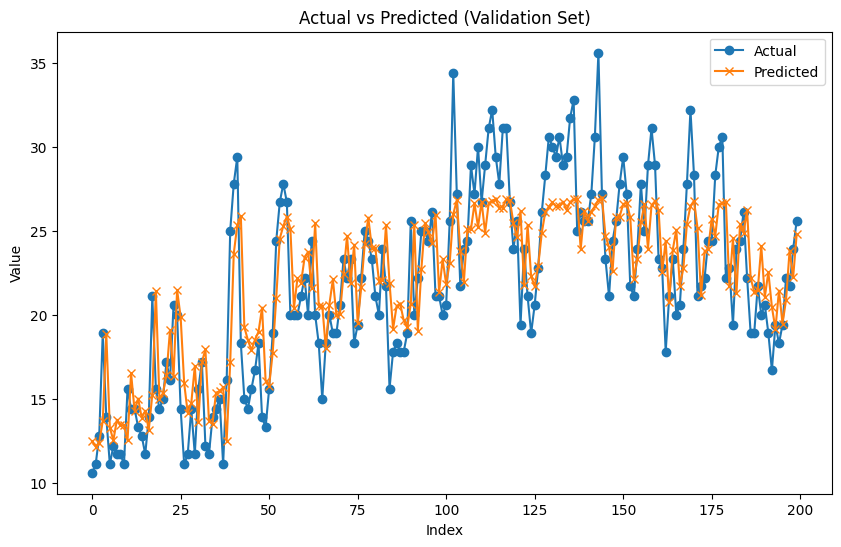

In [25]:
plt.figure(figsize=(10,6))
plt.plot(y_val, label='Actual', marker='o')
plt.plot(y_pred_val, label='Predicted', marker='x')
plt.title('Actual vs Predicted (Validation Set)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

Calculate Metrics

In [ ]:
mae = mean_absolute_error(y_val, y_pred_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f"Validation MAE: {mae:.2f} °C")
print(f"Validation RMSE: {rmse:.2f} °C")

Validation MAE: 2.90 °C
Validation RMSE: 3.65 °C


**Step 8: Streamlit Application (Try Streamlit app running)**





In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import plotly.express as px
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the trained model
model = load_model('lstm_weather_model.h5')

# Streamlit Configuration
st.set_page_config(page_title="Seattle Weather Predictor", page_icon="🌤️", layout="wide")

# Custom CSS for UI styling
st.markdown("""
    <style>
    .main {
        background-color: #f7f9fc;
        font-family: 'Arial', sans-serif;
    }
    h1, h2, h3, h4 {
        color: #2c3e50;
    }
    .stButton button {
        background-color: #3498db;
        color: white;
        border-radius: 5px;
        padding: 8px 20px;
        font-size: 16px;
        margin: 10px 0px;
    }
    .stMetric {
        font-weight: bold;
    }
    footer {
        visibility: hidden;
    }
    </style>
""", unsafe_allow_html=True)

# Title Section
st.title("🌤️ FutureTemp Weather Predictor")
st.markdown("""
Welcome to the **FutureTemp**! This tool uses **LSTM Neural Networks** to forecast the temperature based on historical data.
Enjoy a visually appealing and interactive experience. 🚀
""")

# Sidebar Section for Input
st.sidebar.header("🔧 Configure Inputs")
st.sidebar.markdown("Adjust the input parameters below:")
window_size = st.sidebar.slider("Number of Days for Prediction", min_value=5, max_value=20, value=10)
inputs = []
for i in range(window_size):
    inputs.append(st.sidebar.number_input(f"Day {i+1} Temperature (°C):", value=10.0))

# Prediction and Metrics Section
if st.sidebar.button("🌡️ Predict Temperature"):
    input_data = np.array(inputs).reshape(1, -1, 1)
    prediction = model.predict(input_data)[0][0]

    # Simulate actual temperature for metrics (replace with real data if available)
    actual_temp = [input_data[0, -1, 0] + np.random.uniform(-2, 2)]

    # Calculate Metrics
    mae = mean_absolute_error(actual_temp, [prediction])
    rmse = np.sqrt(mean_squared_error(actual_temp, [prediction]))
    accuracy = 100 - (abs(actual_temp[0] - prediction) / abs(actual_temp[0]) * 100)

    # Result Cards
    st.markdown("## 📊 Results")
    st.success(f"🌡️ **Predicted Temperature**: {prediction:.2f} °C")
    st.info(f"📏 **Simulated Actual Temperature**: {actual_temp[0]:.2f} °C")

    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Mean Absolute Error (MAE)", f"{mae:.2f} °C")
    with col2:
        st.metric("Root Mean Squared Error (RMSE)", f"{rmse:.2f} °C")
    with col3:
        st.metric("Prediction Accuracy (%)", f"{accuracy:.2f} %")

    # Graph Section
    st.markdown("## 📈 Temperature Visualization")
    df_plot = pd.DataFrame({
        'Day': range(len(inputs) + 1),
        'Temperature': inputs + [actual_temp[0]],
        'Type': ['Input'] * len(inputs) + ['Actual']
    })
    df_plot.loc[len(df_plot) - 1, 'Type'] = 'Prediction'

    fig = px.line(df_plot, x='Day', y='Temperature', color='Type',
                  title="Temperature Predictions vs Actual",
                  labels={'Temperature': 'Temperature (°C)', 'Day': 'Day'},
                  template="plotly_white")
    st.plotly_chart(fig, use_container_width=True)

# Footer Section
st.markdown("""
    ---
    Made with ❤️ by ** by Boss 👦🏻 Ice 🧊 Film 🎞️**
    """)

Writing app.py


**Step 9: Streamlit app running**

In [ ]:
from pyngrok import
import subprocess

# Set ngrok authentication
ngrok.set_auth_token("2pfjrub3RYXR8RgEVcqkK4dtJVq_4jw4yz6Nt9KkLxnwBJ2Kb")

# Run Streamlit app
process = subprocess.Popen(['streamlit', 'run', 'app.py'])

# Expose the app with ngrok
public_url = ngrok.connect(8501)
print(f"Streamlit app running at: {public_url}")

Streamlit app running at: NgrokTunnel: "https://ecf0-34-19-8-128.ngrok-free.app" -> "http://localhost:8501"


**=> Last Step: Deploy on https://streamlit.io/**

Create requirements.txt file :

```
streamlit
pandas
numpy
plotly
keras
tensorflow
scikit-learn
kaggle
```




Create FutureTemp_weather.py file :

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st

# Set Kaggle API credentials
if "KAGGLE_USERNAME" in st.secrets and "KAGGLE_KEY" in st.secrets:
    os.environ["KAGGLE_USERNAME"] = st.secrets["KAGGLE_USERNAME"]
    os.environ["KAGGLE_KEY"] = st.secrets["KAGGLE_KEY"]

# Download the dataset using Kaggle API if not already downloaded
if not os.path.exists("seattle-weather.csv"):
    os.system("kaggle datasets download -d ananthr1/weather-prediction --unzip")

# Load the dataset
data = pd.read_csv('seattle-weather.csv')
data.dropna(inplace=True)  # Remove missing values
data['date'] = pd.to_datetime(data['date'])  # Convert date to datetime

# Prepare Data for Training
training = data['temp_max'].values.reshape(-1, 1)

def df_to_XY(data, window_size=10):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

WINDOW_SIZE = 10
X, y = df_to_XY(training, WINDOW_SIZE)

# Split into Train, Validation, Test
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:1000], y[800:1000]
X_test, y_test = X[1000:], y[1000:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define and Train LSTM Model if not already saved
if not os.path.exists('lstm_weather_model.h5'):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)
    model.save('lstm_weather_model.h5')

# Load the trained model
model = load_model('lstm_weather_model.h5')

# Streamlit App Code
st.set_page_config(page_title="Seattle Weather Predictor", page_icon="🌤️", layout="wide")

# Title Section
st.title("🌤️ FutureTemp Weather Predictor")
st.markdown("""
Welcome to the **FutureTemp**! This tool uses **LSTM Neural Networks** to forecast the temperature based on historical data.
Enjoy a visually appealing and interactive experience. 🚀
""")

# Sidebar Section for Input
st.sidebar.header("🔧 Configure Inputs")
st.sidebar.markdown("Adjust the input parameters below:")
window_size = st.sidebar.slider("Number of Days for Prediction", min_value=5, max_value=20, value=10)
inputs = []
for i in range(window_size):
    inputs.append(st.sidebar.number_input(f"Day {i+1} Temperature (°C):", value=10.0))

# Prediction and Metrics Section
if st.sidebar.button("🌡️ Predict Temperature"):
    input_data = np.array(inputs).reshape(1, -1, 1)
    prediction = model.predict(input_data)[0][0]

    # Simulate actual temperature for metrics (replace with real data if available)
    actual_temp = [input_data[0, -1, 0] + np.random.uniform(-2, 2)]

    # Calculate Metrics
    mae = mean_absolute_error(actual_temp, [prediction])
    rmse = np.sqrt(mean_squared_error(actual_temp, [prediction]))
    accuracy = 100 - (abs(actual_temp[0] - prediction) / abs(actual_temp[0]) * 100)

    # Result Cards
    st.markdown("## 📊 Results")
    st.success(f"🌡️ **Predicted Temperature**: {prediction:.2f} °C")
    st.info(f"📏 **Simulated Actual Temperature**: {actual_temp[0]:.2f} °C")

    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("Mean Absolute Error (MAE)", f"{mae:.2f} °C")
    with col2:
        st.metric("Root Mean Squared Error (RMSE)", f"{rmse:.2f} °C")
    with col3:
        st.metric("Prediction Accuracy (%)", f"{accuracy:.2f} %")

    # Graph Section
    st.markdown("## 📈 Temperature Visualization")
    df_plot = pd.DataFrame({
        'Day': range(len(inputs) + 1),
        'Temperature': inputs + [actual_temp[0]],
        'Type': ['Input'] * len(inputs) + ['Actual']
    })
    df_plot.loc[len(df_plot) - 1, 'Type'] = 'Prediction'

    fig = px.line(df_plot, x='Day', y='Temperature', color='Type',
                  title="Temperature Predictions vs Actual",
                  labels={'Temperature': 'Temperature (°C)', 'Day': 'Day'},
                  template="plotly_white")
    st.plotly_chart(fig, use_container_width=True)

# Footer Section
st.markdown("""
    ---
    Made with ❤️ by **by Boss 👦🏻 Ice 🧊 Film 🎞️**
    """)

**MY WEBSITE STREAMLIT**

In [ ]:
print("MY WEBSITE STREAMLIT https://futuretempweatherr-46frt8rysephc6eeazx2an.streamlit.app/")


MY WEBSITE STREAMLIT https://futuretempweatherr-46frt8rysephc6eeazx2an.streamlit.app/


In [ ]:
print("MY CODE BY GITHUB https://github.com/99292677/FutureTemp_weather.git")

MY CODE BY GITHUB https://github.com/99292677/FutureTemp_weather.git
